## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
import nltk
import re
import spacy
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## Read Datasets

In [3]:
fake = pd.read_csv(r"C:\Users\apoor\Downloads\drive-download-20230728T152315Z-001\Fake.csv",encoding='ISO-8859-1')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true = pd.read_csv(r"C:\Users\apoor\Downloads\drive-download-20230728T152315Z-001\True.csv", encoding='ISO-8859-1', error_bad_lines=False)
true.head()

b'Skipping line 11067: expected 4 fields, saw 8\n'


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake.shape

(23481, 4)

In [6]:
true.shape

(21416, 4)

# EDA

In [7]:
fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [8]:
true.describe()

,title,text,subject,date
count,21416,21416,21416,21416
unique,20825,21191,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11271,182


In [9]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [10]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [11]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [12]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [13]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [14]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [15]:
# Adding new column to distribute Fake and Real news

# fake news represented by '0'
# true news represented by '1'

fake['target'] = '0'
true['target'] = '1'

In [16]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [17]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [18]:
# Resetting index

df = pd.concat([fake,true]).reset_index(drop = True)
df.shape

(44897, 5)

In [19]:
df.duplicated().sum()

209

In [20]:
df.drop_duplicates()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44892,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44893,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44894,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44895,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [21]:
#Shuffling the data

from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index(drop = True)

In [55]:
df.head(10)

,title,text,subject,date,target
0,Lawyers Trump Used To Prove He Has No Russi...,It was the tweet that blew up the internet:BRE...,News,"May 12, 2017",0
1,BOOM! Companies That Openly Criticized Trump F...,Among the high profile companies opposing Trum...,left-news,"Jan 31, 2017",0
2,"Turkey, Iran agree to discuss Russia's Syrian ...",ASTANA (Reuters) - Turkey and Iran have agreed...,worldnews,"October 31, 2017",1
3,Shot North Korean defector suffered massive in...,SEOUL (Reuters) - The North Korean soldier who...,worldnews,"November 15, 2017",1
4,Russian bombers hit Islamic State targets in S...,MOSCOW (Reuters) - Russia s Defence Ministry s...,worldnews,"November 24, 2017",1
5,White House urges ban on non-compete agreement...,(Reuters) - The Obama administration on Tuesda...,politicsNews,"October 25, 2016",1
6,Former Swedish Prime Minister BRUTALLY Mocks ...,"Donald Trump s buffonery, lies, and unhinged a...",News,"February 19, 2017",0
7,Donald Trump Cant Even Control His Temper In...,"In a meeting about party unity, Donald Trump...",News,"July 7, 2016",0
8,Clinton: 'We respect the choice the people' ma...,WASHINGTON (Reuters) - Democratic presidential...,politicsNews,"June 24, 2016",1
9,BREAKING NEWS: Senator John McCain Diagnosed W...,The McCain family has requested everyone s pra...,politics,"Jul 19, 2017",0


# Visualization

<AxesSubplot:ylabel='subject'>

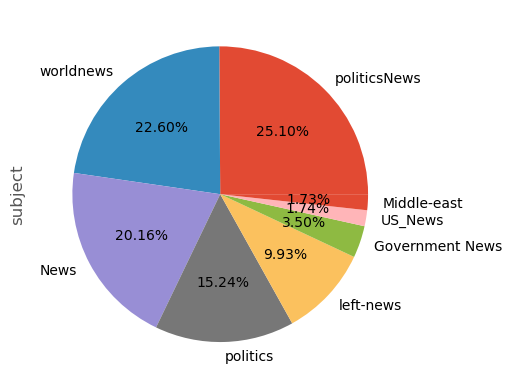

In [56]:
df['subject'].value_counts().plot(kind='pie',autopct='%0.02f%%')

<AxesSubplot:xlabel='target', ylabel='count'>

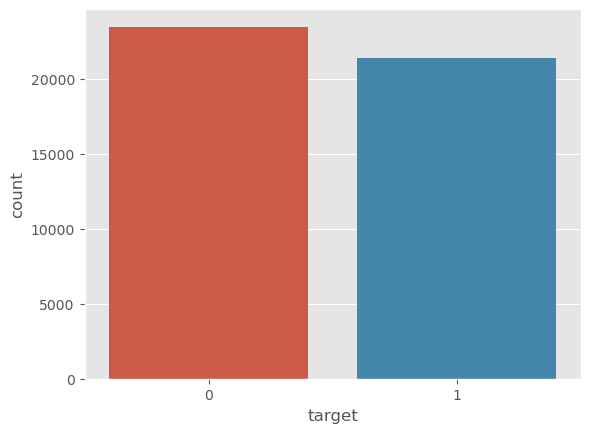

In [57]:
sns.countplot(df['target'])

In [58]:
def worldcloud(data, label):
    txt = ' '.join(data['text'])
    plt.figure(figsize=(20,20))
    wc = WordCloud(background_color='white',stopwords=STOPWORDS,max_words=200,width=1500, height=700).generate(txt)
    plt.imshow(wc,interpolation = 'blackman')
    plt.title(label)
    #plt.axis('off')

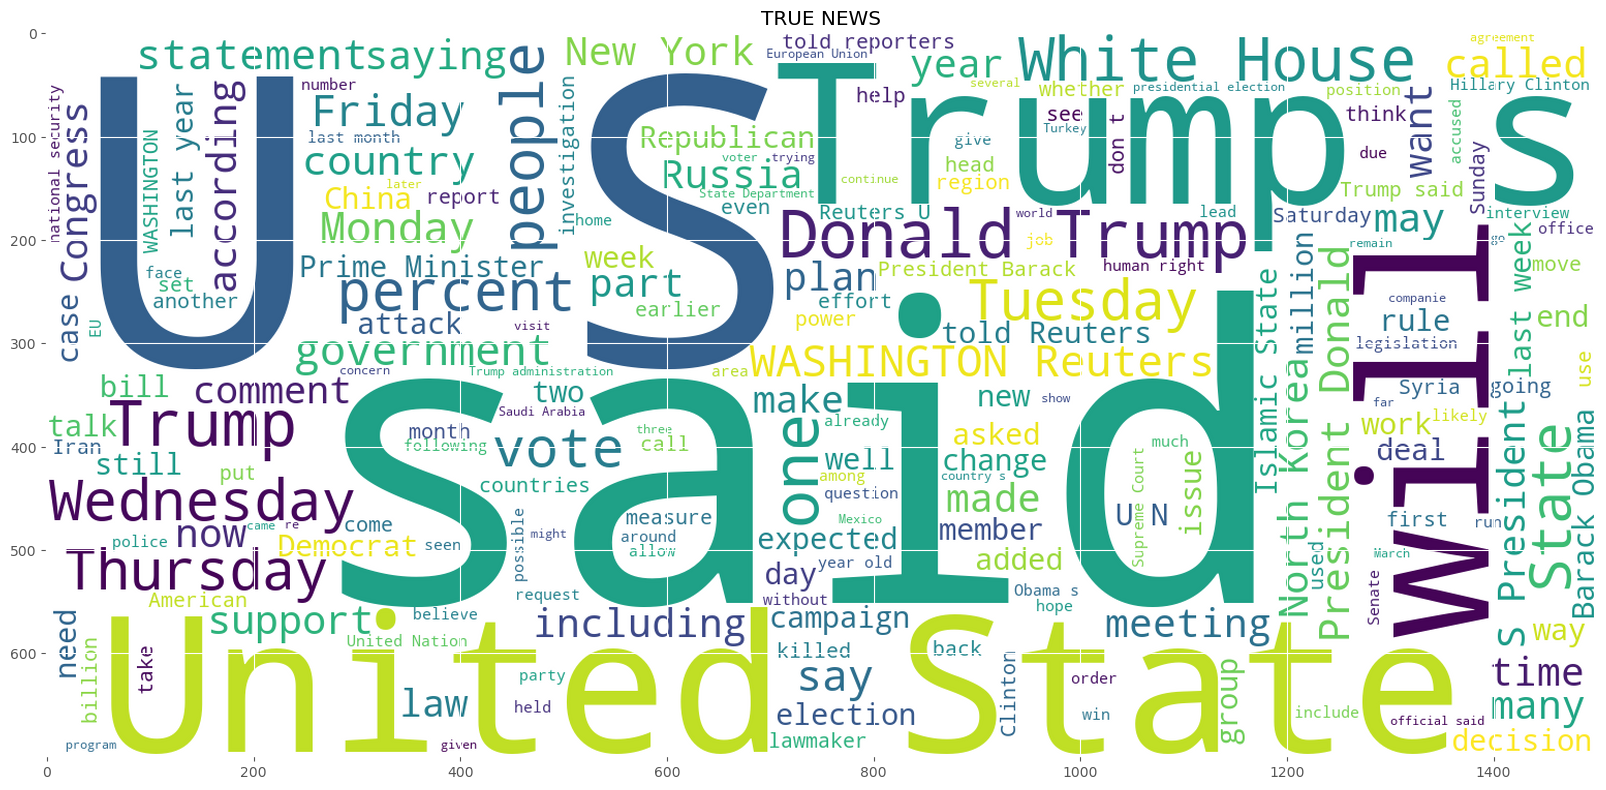

In [59]:
worldcloud(true,'TRUE NEWS')

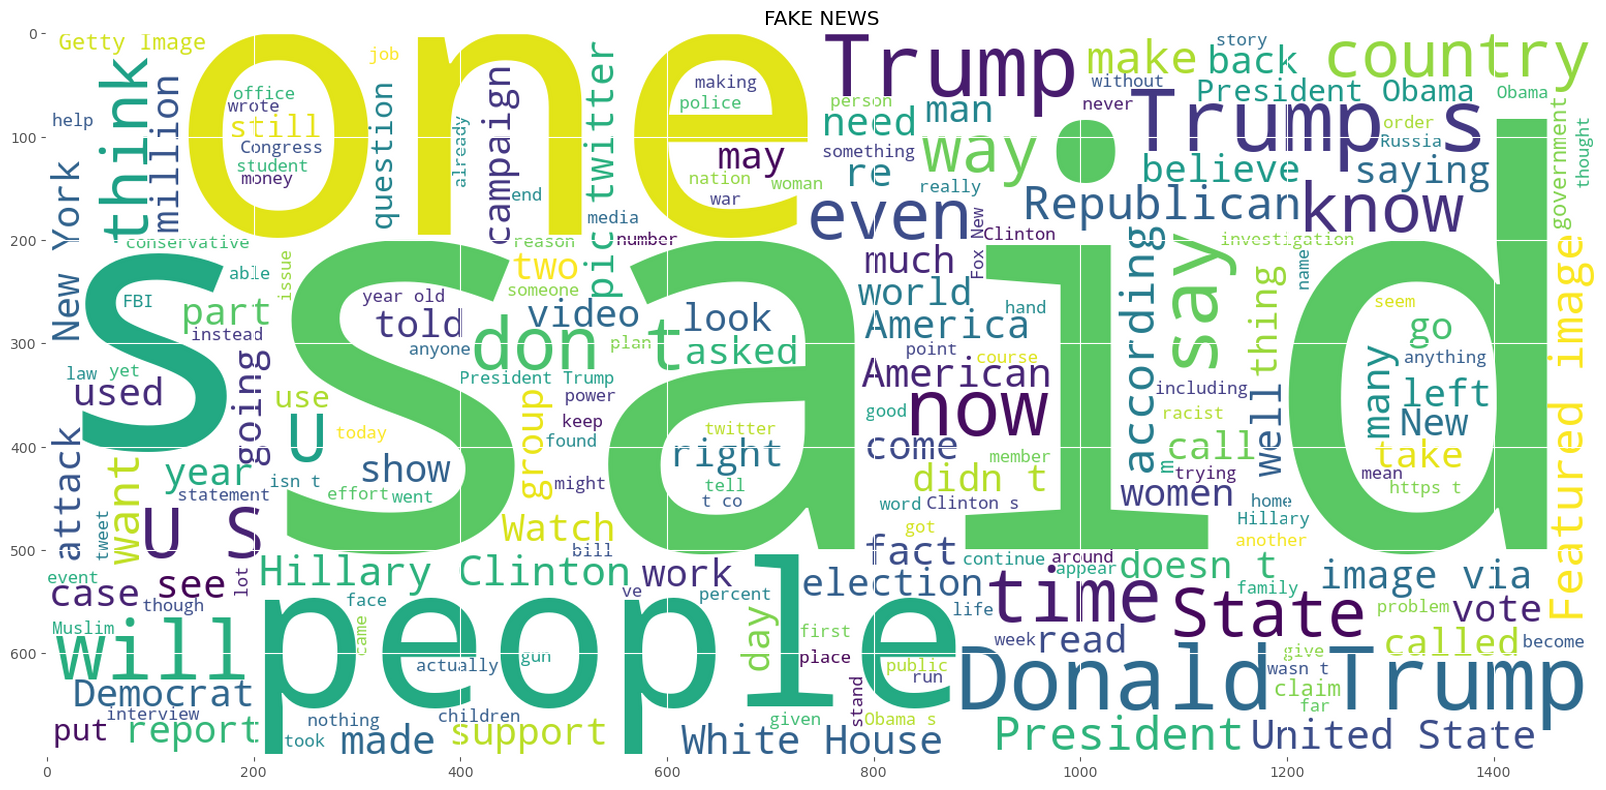

In [60]:
worldcloud(fake,'FAKE NEWS')